# Model creation

,Description,Value
0,Session id,123
1,Original data shape,"(229, 5)"
2,Transformed data shape,"(229, 21)"
3,Categorical features,5
4,Rows with missing values,13.1%
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1643,32.8482,2.0574,0,0,0


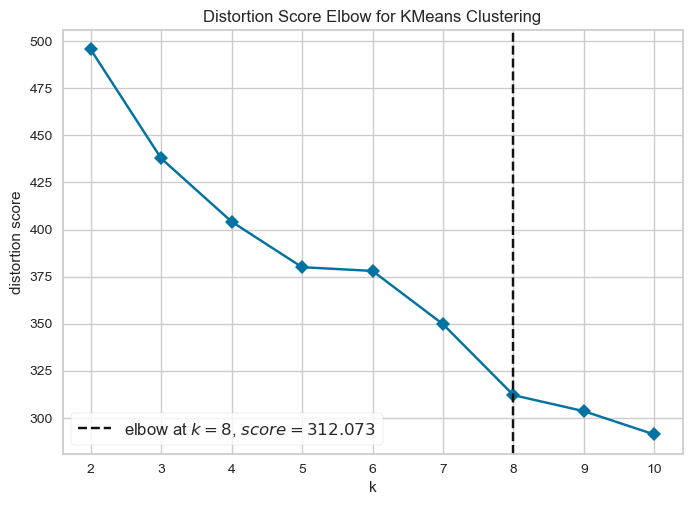

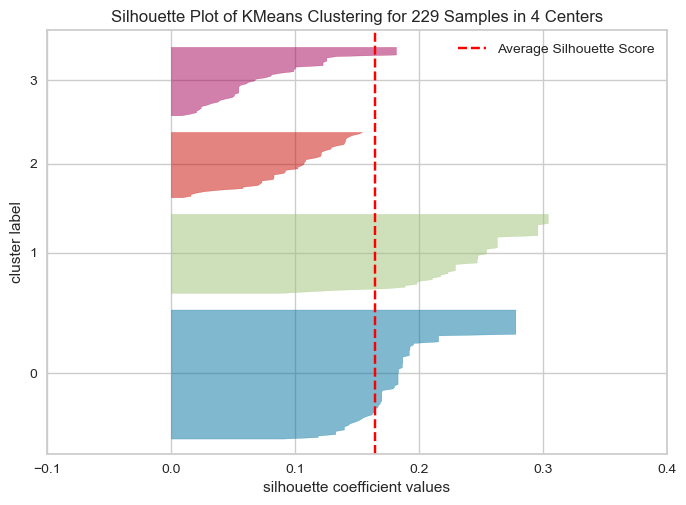

In [4]:
import pandas as pd
from pycaret.clustering import setup, create_model, assign_model, plot_model, save_model, load_model, predict_model

df = pd.read_csv('welcome_survey_simple_v2.csv', sep=';')
s = setup(df, session_id=123)
s.dataset_transformed.head()
kmeans = create_model('kmeans', num_clusters=4)
plot_model(kmeans, plot='elbow') # 8 clusters looks good
plot_model(kmeans, plot='silhouette')

In [5]:
df_with_clusters = assign_model(kmeans)
df_with_clusters

,age,edu_level,fav_animals,fav_place,gender,Cluster
0,<18,Podstawowe,Brak ulubionych,NaN,Kobieta,Cluster 0
1,25-34,Średnie,Psy,Nad wodą,Mężczyzna,Cluster 2
2,45-54,Wyższe,Psy,W lesie,Mężczyzna,Cluster 1
3,35-44,Średnie,Koty,W górach,Mężczyzna,Cluster 2
4,35-44,Wyższe,Psy,Nad wodą,Mężczyzna,Cluster 0
...,...,...,...,...,...,...
224,35-44,Wyższe,Koty,Inne,Kobieta,Cluster 3
225,45-54,Wyższe,Inne,W lesie,Mężczyzna,Cluster 3
226,25-34,Wyższe,Psy,W górach,Mężczyzna,Cluster 1
227,35-44,Wyższe,Brak ulubionych,W górach,Mężczyzna,Cluster 3


In [6]:
df_with_clusters["Cluster"].value_counts()

Cluster
Cluster 0    86
Cluster 1    53
Cluster 3    46
Cluster 2    44
Name: count, dtype: int64

In [7]:
save_model(kmeans, 'welcome_survey_clustering_pipeline_v2', verbose=False)

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=[], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['age', 'edu_level', 'fav_animals',
                                              'fav_place', 'gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['gender'],
                                     transfo...
                                                                mapping=[{'col': 'gender',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Kobieta      0
 Mężczyzna    1
 NaN         -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrappe

In [9]:
kmeans_pipeline = load_model('welcome_survey_clustering_pipeline_v2')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/j9/xtrpqhmd56z8jl7836b372_r0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=[], transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['age', 'edu_level', 'fav_animals',
                                             'fav_place', 'gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_...
                                                               mapping=[{'col': 'gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Kobieta      0
Mężczyzna    1
NaN         -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['age', 'edu_level', 'fav_animals',
                                             'fav_place'],
                                    transformer=OneHotEncoder(cols=['age',
                                                                    'edu_level',
                                                                    'fav_animals',
                                                                    'fav_place'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [10]:
predict_df = pd.DataFrame([
    {
        "age": "<18",  # '<18', '25-34', '45-54', '35-44', '18-24', '>=65', '55-64', 'unknown'
        "edu_level": 'Średnie',  # 'Podstawowe', 'Średnie', 'Wyższe'
        "fav_animals": 'Brak ulubionych',  # 'Brak ulubionych', 'Psy', 'Koty', 'Inne', 'Koty i Psy'
        "fav_place": 'W lesie',  # 'Nad wodą', 'W lesie', 'W górach', 'Inne'
        "gender": 'Kobieta',  # 'Mężczyzna', 'Kobieta'
    }
])

In [11]:
predict_with_clusters_df = predict_model(kmeans_pipeline, data=predict_df)
predict_with_clusters_df["Cluster"]

0    Cluster 2
Name: Cluster, dtype: object